In [1]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import average, std
from numpy.random import random, randint, normal, shuffle,uniform
import scipy
from scipy.stats import ttest_ind
import seaborn as sns
import fnmatch
import os  # handy system and path functions
import sys  # to get file system encoding
import csv
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd  
import matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
import mne
#import FOOOF
from mne.time_frequency import tfr_morlet

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [2]:
ROOT='/data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/'
behav_file='/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_behavior_data/klaudiatest1_alpha_pilot_01_2019_Mar_07_1442.csv'

In [3]:
b=pd.read_csv(behav_file)

In [5]:
cue=mne.read_epochs(ROOT+'Klaudiatest/'+'cue-epo.fif')

Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/Klaudiatest/cue-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2500.00 ms
        0 CTF compensation matrices available
381 matching events found
Applying baseline correction (mode: mean)
381 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 19 columns
0 projection items activated


## high validity absent/high validity present/low validity absent/low validity present

In [11]:
tarN_disH_Absent=cue['tarNdisHlocHLdisA_trig','tarNdisHlocHRdisA_trig', 'tarNdisHlocLdisA_trig']
tarN_disH_Present=cue['tarNdisHlocHLdisP_trig','tarNdisHlocHRdisP_trig','tarNdisHlocLdisP_trig']
tarN_disL_Absent=cue['tarNdisLlocHLdisA_trig','tarNdisLlocHRdisA_trig','tarNdisLlocLdisA_trig']
tarN_disL_Present=cue['tarNdisLlocHLdisP_trig','tarNdisLlocHRdisP_trig','tarNdisLlocLdisP_trig']

In [12]:
freqs = np.logspace(*np.log10([2, 35]), num=20)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_NHA, itc = tfr_morlet(tarN_disH_Absent, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NHP, itc = tfr_morlet(tarN_disH_Present, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NLA, itc = tfr_morlet(tarN_disL_Absent, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NLP, itc = tfr_morlet(tarN_disL_Present, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


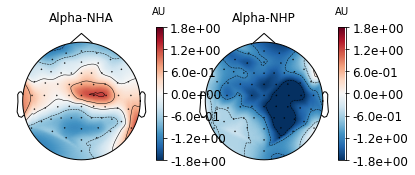

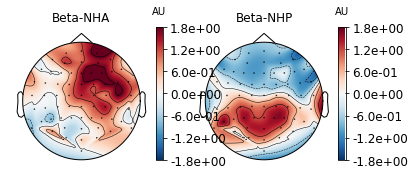

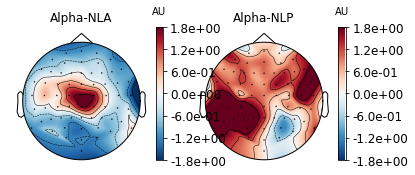

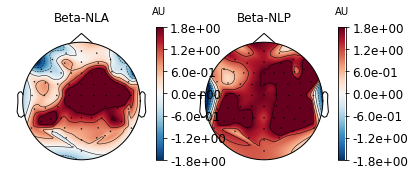

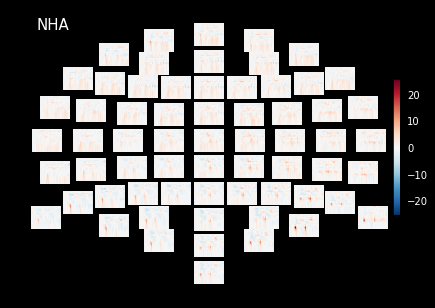

Applying baseline correction (mode: zscore)


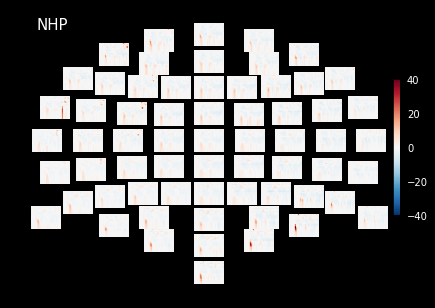

Applying baseline correction (mode: zscore)


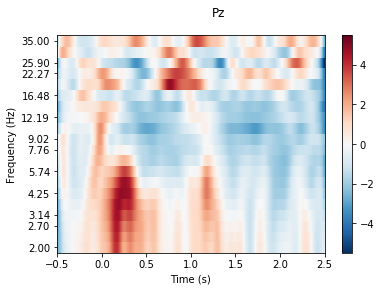

Applying baseline correction (mode: zscore)


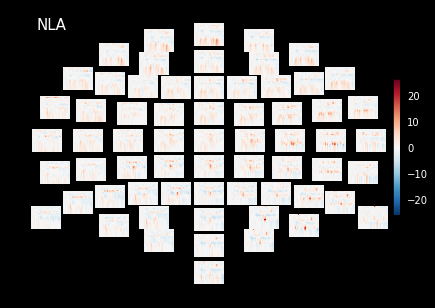

Applying baseline correction (mode: zscore)


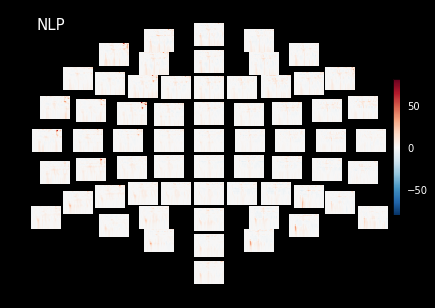

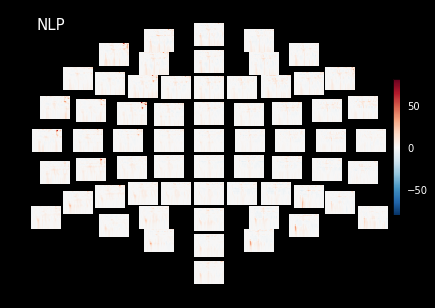

In [22]:
fig1, axis1 = plt.subplots(1, 2)
fig2,axis2=plt.subplots(1,2)
fig3,axis3=plt.subplots(1,2)
fig4,axis4=plt.subplots(1,2)

power_NHA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14, vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-NHA', show=False)
power_NHP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-NHP', show=False)
power_NHA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-NHA', show=False)
power_NHP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-NHP', show=False)

power_NLA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14, vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[0],
                   title='Alpha-NLA', show=False)
power_NLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[1],
                   title='Alpha-NLP', show=False)
power_NLA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis4[0],
                   title='Beta-NLA', show=False)
power_NLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis4[1],
                   title='Beta-NLP', show=False)

power_NHA.plot_topo(baseline=(-0.5,0), mode='zscore', title='NHA')
power_NHP.plot_topo(baseline=(-0.5,0), mode='zscore', title='NHP')
power_NHP.plot([30], baseline=(-0.5,0), mode='zscore', title=power_NHP.ch_names[30])
power_NLA.plot_topo(baseline=(-0.5,0), mode='zscore', title='NLA')
power_NLP.plot_topo(baseline=(-0.5,0), mode='zscore', title='NLP')

## high validity high prob loc right present / high validity high prob loc left present / high validity high prob loc right absent /high validity high prob loc left absent

In [18]:
tarN_disH_locHR_disP=cue['tarNdisHlocHRdisP_trig']
tarN_disH_locHL_disP=cue['tarNdisHlocHLdisP_trig']
tarN_disH_locHR_disA=cue['tarNdisHlocHRdisA_trig']
tarN_disH_locHL_disA=cue['tarNdisHlocHLdisA_trig']

In [19]:
power_NRP, itc = tfr_morlet(tarN_disH_locHR_disP, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NLP, itc = tfr_morlet(tarN_disH_locHL_disP, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NRA, itc = tfr_morlet(tarN_disH_locHR_disA, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_NLA, itc = tfr_morlet(tarN_disH_locHL_disA, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


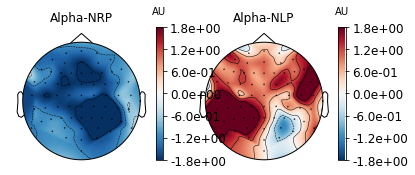

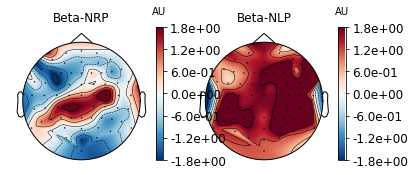

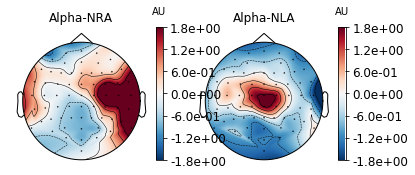

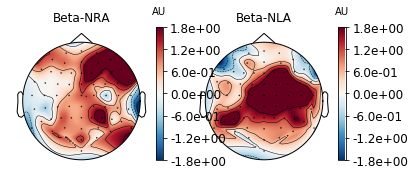

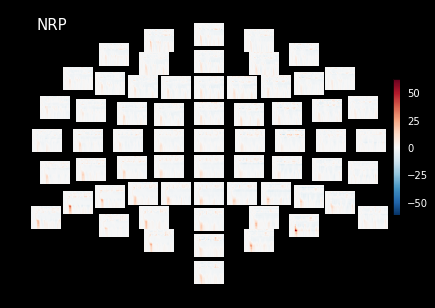

Applying baseline correction (mode: zscore)


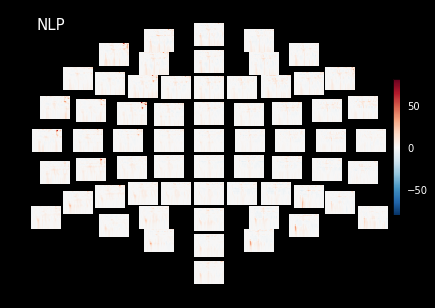

Applying baseline correction (mode: zscore)


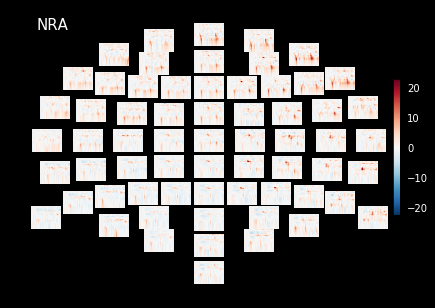

Applying baseline correction (mode: zscore)


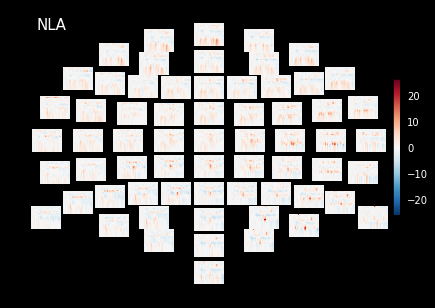

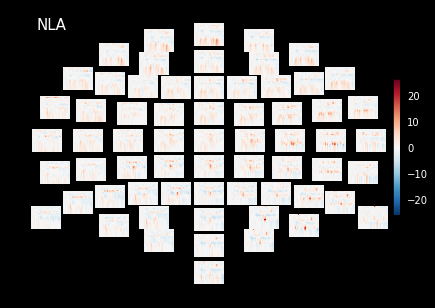

In [20]:
fig1, axis1 = plt.subplots(1, 2)
fig2,axis2=plt.subplots(1,2)
fig3,axis3=plt.subplots(1,2)
fig4,axis4=plt.subplots(1,2)

power_NRP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14, vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-NRP', show=False)
power_NLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-NLP', show=False)
power_NRP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-NRP', show=False)
power_NLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-NLP', show=False)

power_NRA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14, vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[0],
                   title='Alpha-NRA', show=False)
power_NLA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[1],
                   title='Alpha-NLA', show=False)
power_NRA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis4[0],
                   title='Beta-NRA', show=False)
power_NLA.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis4[1],
                   title='Beta-NLA', show=False)

power_NRP.plot_topo(baseline=(-0.5,0), mode='zscore', title='NRP')
power_NLP.plot_topo(baseline=(-0.5,0), mode='zscore', title='NLP')
power_NRA.plot_topo(baseline=(-0.5,0), mode='zscore', title='NRA')
power_NLA.plot_topo(baseline=(-0.5,0), mode='zscore', title='NLA')